In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris_df = pd.read_csv('/content/Iris.csv')

In [3]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Removed 'Id' column from dataset
iris_df.drop('Id', axis=1, inplace=True)

In [9]:
# Checks the null values per each column
iris_df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


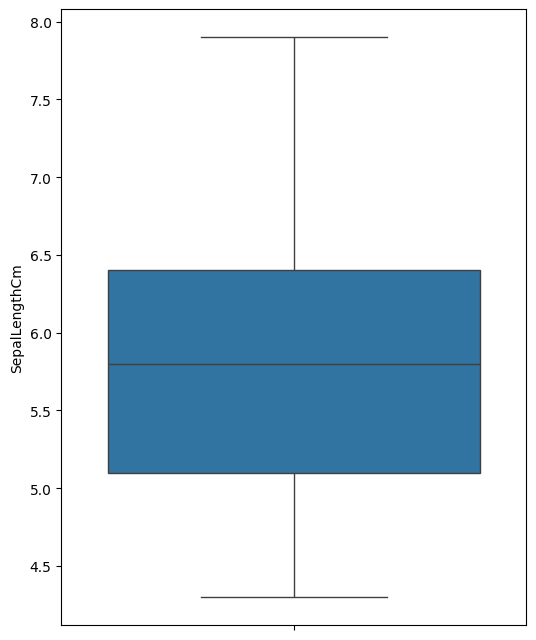

In [11]:
# Check outliers in 'SepalLengthCm' column
import seaborn as sns

plt.figure(figsize=(6, 8))
sns.boxplot(iris_df['SepalLengthCm'])
plt.show();

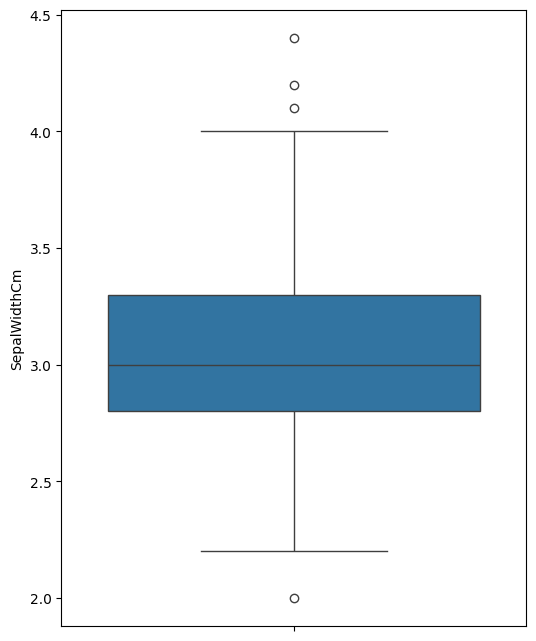

In [12]:
# Check outliers in 'SepalWidthCm' column
import seaborn as sns

plt.figure(figsize=(6, 8))
sns.boxplot(iris_df['SepalWidthCm'])
plt.show();

In [13]:
# Remove outlier
Q1 = iris_df['SepalWidthCm'].quantile(0.25)
Q2 = iris_df['SepalWidthCm'].median()
Q3 = iris_df['SepalWidthCm'].quantile()
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR
iris_df = iris_df[(iris_df['SepalWidthCm'] >= lower_bound) & (iris_df['SepalWidthCm'] <= upper_bound)]

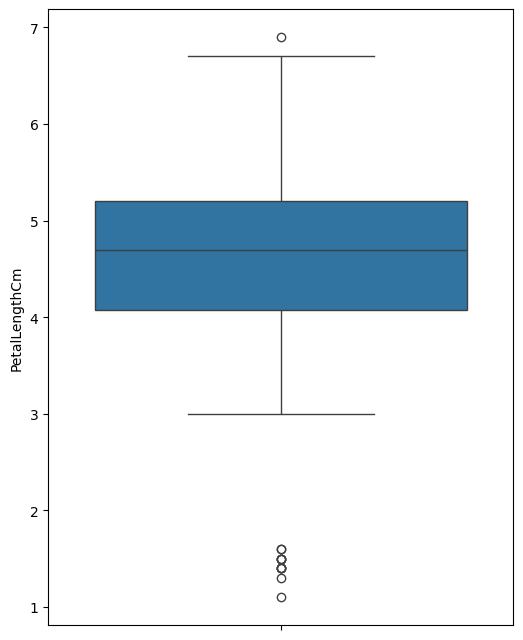

In [16]:
# Check outliers in 'PetalLengthCm' column
import seaborn as sns

plt.figure(figsize=(6, 8))
sns.boxplot(iris_df['PetalLengthCm'])
plt.show();

In [17]:
# Remove outlier
Q1 = iris_df['PetalLengthCm'].quantile(0.25)
Q2 = iris_df['PetalLengthCm'].median()
Q3 = iris_df['PetalLengthCm'].quantile()
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR
iris_df = iris_df[(iris_df['PetalLengthCm'] >= lower_bound) & (iris_df['PetalLengthCm'] <= upper_bound)]

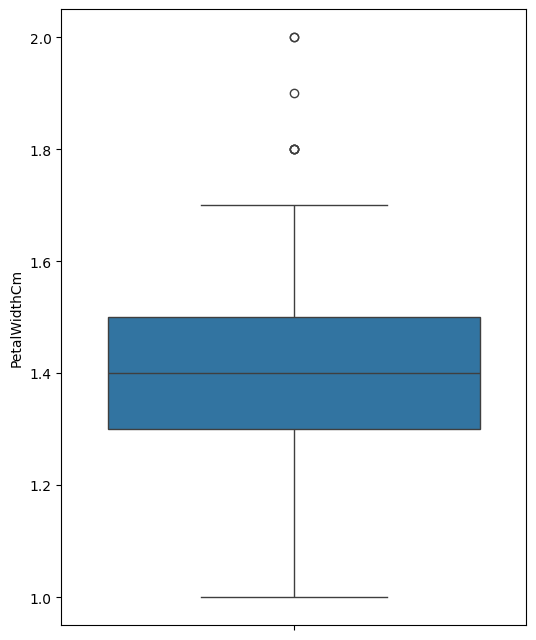

In [19]:
# Check outliers in 'PetalWidthCm' column
import seaborn as sns

plt.figure(figsize=(6, 8))
sns.boxplot(iris_df['PetalWidthCm'])
plt.show();

In [20]:
# Remove outlier
Q1 = iris_df['PetalWidthCm'].quantile(0.25)
Q2 = iris_df['PetalWidthCm'].median()
Q3 = iris_df['PetalWidthCm'].quantile()
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR
iris_df = iris_df[(iris_df['PetalWidthCm'] >= lower_bound) & (iris_df['PetalWidthCm'] <= upper_bound)]

In [23]:
iris_df.reset_index(inplace=True)

In [24]:
iris_df

,level_0,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,55,5.7,2.8,4.5,1.3,Iris-versicolor
1,1,58,6.6,2.9,4.6,1.3,Iris-versicolor
2,2,59,5.2,2.7,3.9,1.4,Iris-versicolor
3,3,63,6.1,2.9,4.7,1.4,Iris-versicolor
4,4,64,5.6,2.9,3.6,1.3,Iris-versicolor
5,5,65,6.7,3.1,4.4,1.4,Iris-versicolor
6,6,71,6.1,2.8,4.0,1.3,Iris-versicolor
7,7,73,6.1,2.8,4.7,1.2,Iris-versicolor
8,8,74,6.4,2.9,4.3,1.3,Iris-versicolor
9,9,75,6.6,3.0,4.4,1.4,Iris-versicolor


In [25]:
# target column is 'Species'
X = iris_df.drop('Species', axis=1)
y = iris_df['Species'].copy()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model - Classification with Logistic Regression

In [29]:
# Cjec whether data is imbalanced or not
y_train.value_counts()

,count
Species,
Iris-versicolor,17
